# Plotting with geopandas

The mapdata used in this exercise is taken from [gist.github.com/curran](https://gist.github.com/curran/49fa25fc44c84fcbebb51e60946145a4). It is a json file containing the geometry of each district in India, and the numbers are in terms of lattitude and longitude.

Necessary python packages:
- [geopandas](https://geopandas.org/en/stable/docs/user_guide.html) (can be installed with conda)

Other packages used in this exercise:
- json
- numpy
- pandas
- matplotlib
- random

In [1]:
import json
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import cm
from matplotlib.colors import Normalize, ListedColormap
import random

file_path = "mapdata/INDIA_DISTRICTS_TOPO.json" 
gdf = gpd.read_file(file_path)

print(f'Data loaded in the format : {type(gdf)}')

state_color_dict = None
coordinates_dict = None
with open('mydata/state_colors.json', 'r') as f:           state_color_dict = json.load(f)
with open('mydata/major_city_coordinates.json', 'r') as f: coordinates_dict = json.load(f)
print(f'json data loaded.')

Data loaded in the format : <class 'geopandas.geodataframe.GeoDataFrame'>
json data loaded.


## Plotting without data

First, let's make some maps without putting any data on it.

### Investigating the dataframe

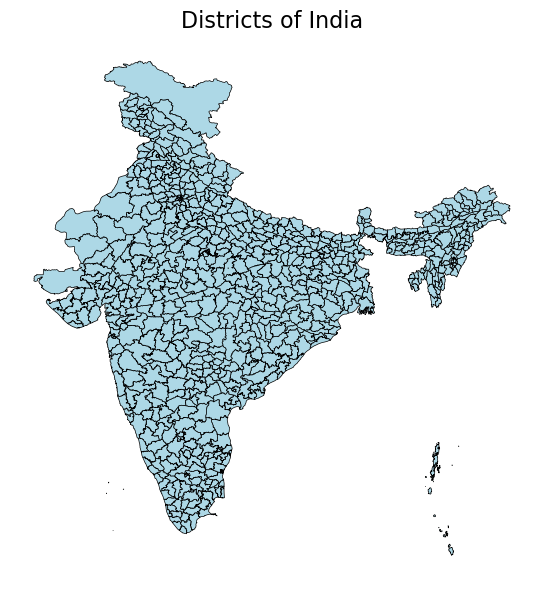

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))

gdf.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.5)
ax.set_title("Districts of India", fontsize=16)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_aspect('equal')
for spine in ax.spines.values(): spine.set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()

### How information is organized in the dataframe

In [3]:
print('These are the columns in the dataframe:\n')
print(gdf.columns)

These are the columns in the dataframe:

Index(['id', 'dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat',
       'SHAPE_Length', 'SHAPE_Area', 'OBJECTID', 'test', 'Dist_LGD',
       'State_LGD', 'geometry'],
      dtype='object')


In [4]:
print('This is how the first few rows look like:\n')
display(gdf.head())

This is how the first few rows look like:



,id,dtname,stname,stcode11,dtcode11,year_stat,SHAPE_Length,SHAPE_Area,OBJECTID,test,Dist_LGD,State_LGD,geometry
0,1,Morbi,GUJARAT,24,727,update2014,598334.202641,5.892260e+09,1,None,673,24,"POLYGON ((71.27035 23.15578, 71.26985 23.138, ..."
1,2,Ahmadabad,GUJARAT,24,474,2011_c,950616.802956,8.557033e+09,2,None,438,24,"POLYGON ((72.3364 23.10706, 72.35605 23.08813,..."
2,3,Anand,GUJARAT,24,482,2011_c,434665.001203,3.732902e+09,3,None,440,24,"POLYGON ((73.21982 22.62608, 73.20193 22.61823..."
3,4,Devbhumi Dwarka,GUJARAT,24,728,update2014,730297.608335,4.869684e+09,4,None,674,24,"MULTIPOLYGON (((69.62897 22.4589, 69.6461 22.4..."
4,5,Jamnagar,GUJARAT,24,477,2011_c,814332.844603,6.944454e+09,5,None,447,24,"MULTIPOLYGON (((70.53631 22.40603, 70.53027 22..."


### Combining the districts in each state
- The geometry of each district in a state are combined. This is done for every state.
- The colors for each state is taken from an external json file: `mydata/state_colors.json`
- Some cities are also overlayed with annotation, who'se coordinates are picked from: `mydata/major_city_coordinates.json`

In [5]:
### List all the states in the dataframe:
states_list = np.sort(gdf['stname'].unique()).tolist()
print('-'*20+'\n'+f'List of {len(states_list)} states:'+'\n'+'-'*20)
print(states_list)

### Create another dataframe by merging the districts in each state.
invalid_geometries = gdf[~gdf.is_valid]
gdf['geometry'] = gdf['geometry'].buffer(0)
gdf_states = gdf.dissolve(by='stname')
gdf_states = gdf_states.reset_index()
gdf_states['color'] = gdf_states['stname'].map(lambda x: state_color_dict.get(x, 'gray'))  # Default to 'gray' if not found

--------------------
List of 36 states:
--------------------
['ANDAMAN & NICOBAR', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DADRA,NAGAR HAVELI,DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LADAKH', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']


In [6]:
print('These are the columns in the dataframe:\n')
print(gdf_states.columns)

These are the columns in the dataframe:

Index(['stname', 'geometry', 'id', 'dtname', 'stcode11', 'dtcode11',
       'year_stat', 'SHAPE_Length', 'SHAPE_Area', 'OBJECTID', 'test',
       'Dist_LGD', 'State_LGD', 'color'],
      dtype='object')


In [7]:
print('This is how the first few rows look like:\n')
display(gdf_states.head())

This is how the first few rows look like:



,stname,geometry,id,dtname,stcode11,dtcode11,year_stat,SHAPE_Length,SHAPE_Area,OBJECTID,test,Dist_LGD,State_LGD,color
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((92.57589 10.80547, 92.58672 10...",259,Nicobars,35,638,2011_c,9.501589e+05,1.820718e+09,259,None,603,35,RoyalBlue
1,ANDHRA PRADESH,"POLYGON ((79.48056 13.33991, 79.45613 13.33852...",729,Alluri Sitharama Raju,37,805,None,1.256710e+06,1.407018e+10,729,None,745,28,DarkOrange
2,ARUNACHAL PRADESH,"POLYGON ((93.20287 26.94359, 93.17894 26.93712...",459,Anjaw,12,260,2011_c,4.498983e+05,7.754393e+09,459,None,628,12,ForestGreen
3,ASSAM,"POLYGON ((92.69126 24.36274, 92.68975 24.3535,...",118,Tinsukia,18,309,2011_c,4.827073e+05,4.867715e+09,118,None,302,18,FireBrick
4,BIHAR,"POLYGON ((85.39747 24.54469, 85.39193 24.53038...",460,Araria,10,209,2011_c,4.528762e+05,3.480179e+09,460,None,188,10,Purple


### Plotting the states

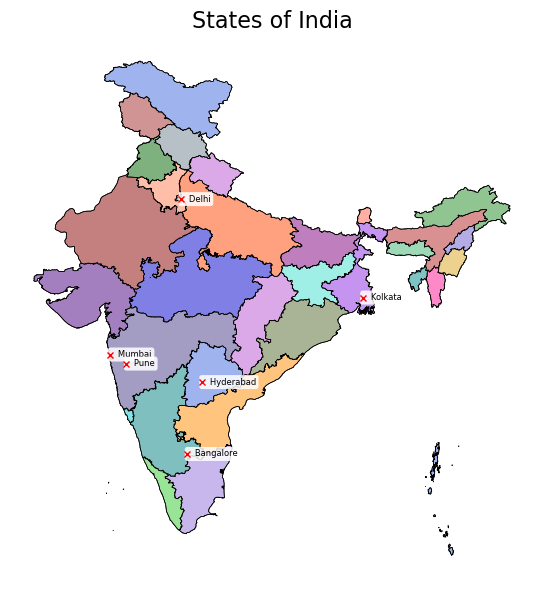

In [8]:
### Plotting:
fig, ax = plt.subplots(figsize=(6, 6))

### Fill the states with color
gdf_states.plot(ax=ax, facecolor=gdf_states['color'], edgecolor='none', alpha=0.5, linewidth=0)

### Plot each state boundary separately with solid edges (not affected by alpha)
gdf_states.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

### Plot the outer boundary
boundary = gdf.union_all()
gpd.GeoSeries([boundary]).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

### Decorations:
ax.set_title("States of India", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
for spine in ax.spines.values(): spine.set_visible(False)
ax.grid(False)

### Putting custom coordinates:
for city, coords in coordinates_dict.items():
    latitude, longitude = coords
    ax.annotate('   '+city, (longitude, latitude), color='black', fontsize=6, ha='left', va='center', zorder=5,
               bbox=dict(facecolor='white', edgecolor='none', boxstyle="round,pad=0.3", alpha=0.85))
    ax.plot(longitude, latitude, marker='x', color='red', markersize=5, zorder=6)

### Hadnling the legend:
legend_handles = [Patch(color=color, label=state) for state, color in state_color_dict.items()]
#ax.legend(handles=legend_handles, title="States", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

### Plotting one specific state of choice
- One specific state is extracted from the larger dataframe and stored as `gdf_mystate`.
- Instead of legends, the plot is annotated with numbers (in alphabetical orders) for convenience.

In [9]:
state_name = 'ASSAM'

# Filter the GeoDataFrame for the chosen state
gdf_mystate = gdf[gdf['stname'] == state_name].copy()
districts_list = np.sort(gdf_mystate['dtname'].unique()).tolist()

print('-'*30+'\n'+f'List of {len(districts_list)} districts in {state_name}:'+'\n'+'-'*30)
print(districts_list)

### Assign random colors for the districts from a template.
cmap = plt.colormaps["Set3"]
colors = [cmap(i) for i in range(cmap.N)]  # Get all colors from the colormap
random_color_dict = {district: colors[i % len(colors)] for i, district in enumerate(districts_list)}
gdf_mystate['color'] = gdf_mystate.index.map(random_color_dict)

------------------------------
List of 34 districts in ASSAM:
------------------------------
['Bajali', 'Baksa', 'Barpeta', 'Biswanath', 'Bongaigaon', 'Cachar', 'Charaideo', 'Chirang', 'Darrang', 'Dhemaji', 'Dhubri', 'Dibrugarh', 'Dima Hasao', 'Goalpara', 'Golaghat', 'Hailakandi', 'Hojai', 'Jorhat', 'Kamrup', 'Kamrup Metropolitan', 'Karbi Anglong', 'Karimganj', 'Kokrajhar', 'Lakhimpur', 'Majuli', 'Morigaon', 'Nagaon', 'Nalbari', 'Sivasagar', 'Sonitpur', 'South Salmara Mancachar', 'Tinsukia', 'Udalguri', 'West Karbi Anglong']


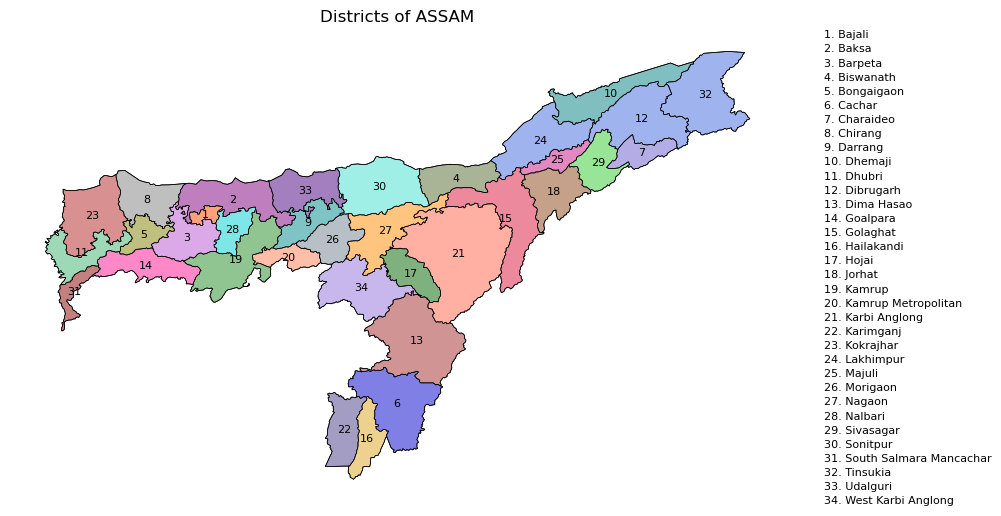

In [10]:
# Plot the selected state
fig, ax = plt.subplots(figsize=(10, 10))

gdf_mystate.plot(ax=ax, facecolor=gdf_states['color'], edgecolor='black', linewidth=0, alpha=0.5)
gdf_mystate.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)
boundary_mystate = gdf_mystate.union_all()
gpd.GeoSeries([boundary_mystate]).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Annotate each district with its alphabetical number
for i, district in enumerate(districts_list):
    district_geom = gdf_mystate[gdf_mystate['dtname'] == district].geometry.iloc[0]
    centroid = district_geom.centroid
    x, y = centroid.x, centroid.y
    #representative_point = district_geom.representative_point()
    #x, y = representative_point.x, representative_point.y
    ax.annotate(f'{i+1}', (x, y), color='black', fontsize=8, ha='center', va='center', zorder=6)

ax.set_title(f"Districts of {state_name}")
ax.set_xticks([])
ax.set_yticks([])
#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")
for spine in ax.spines.values(): spine.set_visible(False)
ax.grid(False)

# Positioning the legend on the left, displaying the number and district name
for i, district in enumerate(districts_list):
    # Set the y-position of each label (ensuring no box, only text)
    ax.text(1.05, 1 - i * 0.03, f'{i+1}. {district}', transform=ax.transAxes, fontsize=8, color='black', ha='left', va='top')

# Show the plot
#plt.tight_layout()
plt.show()

---

## Plotting with data

At this point, we have three dataframes.
- `gdf`        : Original dataframe containing district level information.
- `gdf_states` : New dataframe with the districts combined for each state.
- `gdf_mystate`: Specific dataframe for one state containing district level information.

For most of the time, I will stick to `gdf_states`, because I have data in the state-level. The data is taken from an external spreadsheet.

### Data preparation

In [11]:
import pandas as pd
excel_file = 'mydata/state_data.xlsx'
state_data_df = pd.read_excel(excel_file, sheet_name='Sheet1', engine='openpyxl')
state_data_df['States'] = state_data_df['States'].str.strip() # Strip any extra spaces
print(state_data_df.head())

   S.No             States    Year
0   1.0  ANDAMAN & NICOBAR  1956.0
1   2.0     ANDHRA PRADESH  2014.0
2   3.0  ARUNACHAL PRADESH  1987.0
3   4.0              ASSAM  1972.0
4   5.0              BIHAR  1950.0


In [12]:
# Merge state data with geometry
columns_to_merge = ['States', 'Year']
gdf_states = gdf_states.merge(state_data_df[columns_to_merge], left_on='stname', right_on='States', how='left')
print('Spreadsheet data merged with state data.')

Spreadsheet data merged with state data.


### Plotting function

In [13]:
def plot_column(gdf_states,
                column_name,
                colormap='summer',
                reverse=False,
                figsize=(6, 6),
                legendheader="",
                plottitle=""):

    cmap = plt.colormaps[colormap]
    if reverse:
        n_colors = 256  # The number of discrete color levels
        colors = cmap(np.linspace(0, 1, n_colors))  # Get the colors
        cmap = ListedColormap(colors[::-1])  # Reverse the colormap
        
    norm = Normalize(vmin=gdf_states[column_name].min(), vmax=gdf_states[column_name].max())

    fig, ax = plt.subplots(figsize=figsize)
    gdf_states.plot(ax=ax, column=column_name, cmap=cmap, edgecolor='black', linewidth=0.5, legend=False)

    ax.set_title(plottitle, fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ax.spines.values(): spine.set_visible(False)
    ax.grid(False)

    # Add a colorbar with a smaller size
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Necessary for the colorbar
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)  # Adjust fraction and pad to make it smaller
    cbar.set_label(legendheader, fontsize=12)
    cbar.ax.tick_params(labelsize=8)  # Make the colorbar ticks smaller
    cbar.ax.yaxis.set_ticks_position('right')  # Move ticks to the right
    cbar.ax.tick_params(labelleft=False, labelright=True)  # Show labels on the right

    plt.tight_layout()
    plt.show()

print('Function ready!')

Function ready!


### Examples

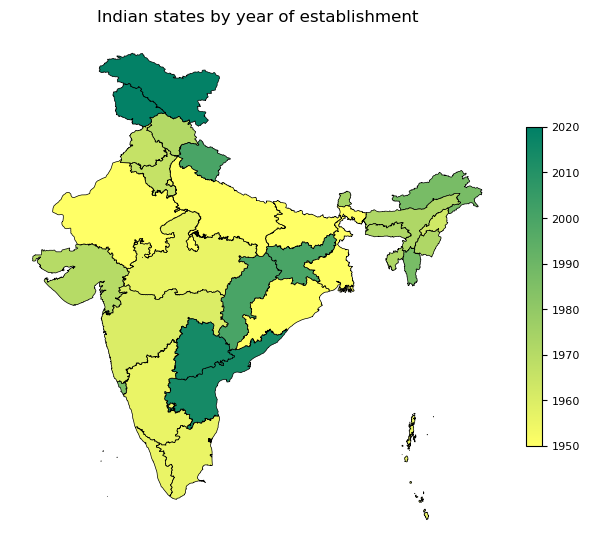

In [14]:
plot_column(gdf_states,
            column_name='Year',
            colormap='summer',
            reverse=True,
            plottitle='Indian states by year of establishment')